# ALGORITMO DE DIKSTRA PARA CONECTAR LAS CARRETERAS DEL QUINDÍO

### Importacion de las librerias necesarias para el funcionamiento del algoritmo

In [65]:
import osmnx as ox
import random
import heapq

## 1. Cree un grafo que represente la red de carreteras que conecta a los doce municipios del departamento del Quindío

### Importación del Departamento del Quindío, Colombia

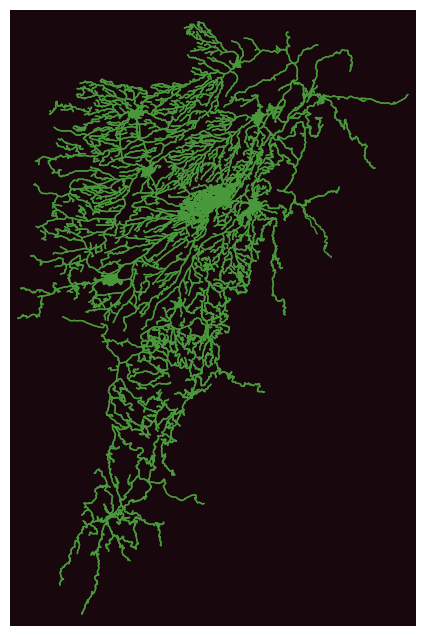

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [66]:
place_name = "Quindío, Colombia"
G = ox.graph_from_place(place_name, network_type="drive")
ox.plot_graph(
        G,
        node_size =  1,
        edge_color = "#4a993c",
        node_color = "#4a993c",
        bgcolor = "#18080e")

In [67]:
for edge in G.edges:
    maxspeed = 40
    if "maxspeed" in G.edges[edge]:
        maxspeed = G.edges[edge]["maxspeed"]
        if type(maxspeed) == list:
            speeds = [ int(speed) for speed in maxspeed ]
            maxspeed = min(speeds)
        elif type(maxspeed) == str:
            maxspeed = int(maxspeed)
    G.edges[edge]["maxspeed"] = maxspeed
    G.edges[edge]["weight"] = G.edges[edge]["length"] / maxspeed

### Estilos Visuales

In [68]:
def style_unvisited_edge(edge):        
    G.edges[edge]["color"] = "#4a993c"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def style_visited_edge(edge):
    G.edges[edge]["color"] = "#4c7d43"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def style_active_edge(edge):
    G.edges[edge]["color"] = '#4c7d43'
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def style_path_edge(edge):
    G.edges[edge]["color"] = "white"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

### Función para graficar el grafo

In [69]:
def plot_graph():
    ox.plot_graph(
        G,
        node_size =  [ G.nodes[node]["size"] for node in G.nodes ],
        edge_color = [ G.edges[edge]["color"] for edge in G.edges ],
        edge_alpha = [ G.edges[edge]["alpha"] for edge in G.edges ],
        edge_linewidth = [ G.edges[edge]["linewidth"] for edge in G.edges ],
        node_color = "white",
        bgcolor = "#18080e"
    )

## Algoritmo de Dijkstra

In [70]:
def dijkstra(orig, dest, plot=False):
    for node in G.nodes:
        G.nodes[node]["visited"] = False
        G.nodes[node]["distance"] = float("inf")
        G.nodes[node]["previous"] = None
        G.nodes[node]["size"] = 0
    for edge in G.edges:
        style_unvisited_edge(edge)
    G.nodes[orig]["distance"] = 0
    G.nodes[orig]["size"] = 50
    G.nodes[dest]["size"] = 50
    pq = [(0, orig)]
    step = 0
    while pq:
        _, node = heapq.heappop(pq)
        if node == dest:
            if plot:
                print("Iteraciones:", step)
                plot_graph()
            return
        if G.nodes[node]["visited"]: continue
        G.nodes[node]["visited"] = True
        for edge in G.out_edges(node):
            style_visited_edge((edge[0], edge[1], 0))
            neighbor = edge[1]
            weight = G.edges[(edge[0], edge[1], 0)]["weight"]
            if G.nodes[neighbor]["distance"] > G.nodes[node]["distance"] + weight:
                G.nodes[neighbor]["distance"] = G.nodes[node]["distance"] + weight
                G.nodes[neighbor]["previous"] = node
                heapq.heappush(pq, (G.nodes[neighbor]["distance"], neighbor))
                for edge2 in G.out_edges(neighbor):
                    style_active_edge((edge2[0], edge2[1], 0))
        step += 1

In [71]:
def reconstruct_path(orig, dest, plot=False, algorithm=None):
    for edge in G.edges:
        style_unvisited_edge(edge)
    dist = 0
    speeds = []
    curr = dest
    while curr != orig:
        prev = G.nodes[curr]["previous"]
        dist += G.edges[(prev, curr, 0)]["length"]
        speeds.append(G.edges[(prev, curr, 0)]["maxspeed"])
        style_path_edge((prev, curr, 0))
        if algorithm:
            G.edges[(prev, curr, 0)][f"{algorithm}_uses"] = G.edges[(prev, curr, 0)].get(f"{algorithm}_uses", 0) + 1
        curr = prev
    dist /= 1000
    if plot:
        print(f"Distance: {dist}")
        print(f"Avg. speed: {sum(speeds)/len(speeds)}")
        print(f"Total time: {dist/(sum(speeds)/len(speeds)) * 60}")
        plot_graph()

## TEST Armenia-Lugar Aleatorio
### Se toma como lugar de inicio la plaza de Bolivar y se toma un nodo aleatorio en cualquier parte del departamento 
### Uso de coordenadas para la posición

In [72]:
start = (4.532571193032303, -75.6728794763243)
start_node = ox.distance.nearest_nodes(G, X=start[1], Y=start[0])

print(start_node)
end = random.choice(list(G.nodes))

10042792787


In [73]:
dijkstra(start_node, end)

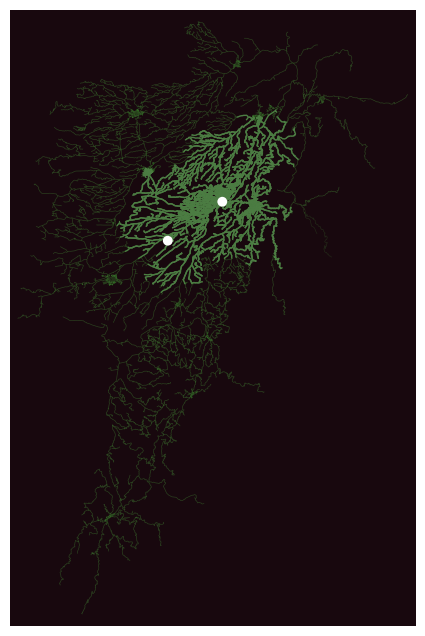

In [74]:
plot_graph()

Distance: 13.000772000000003
Avg. speed: 43.63636363636363
Total time: 17.876061500000006


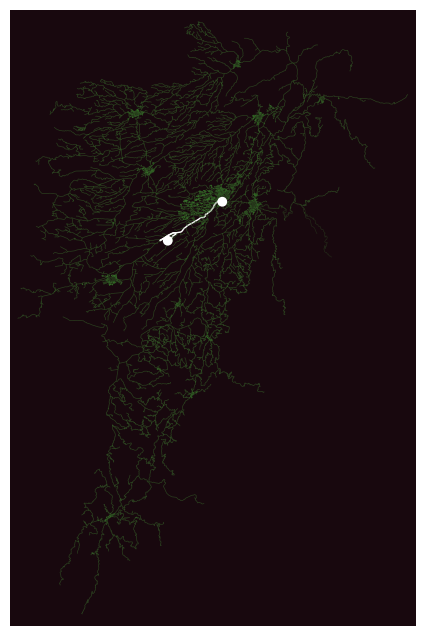

In [75]:
reconstruct_path(start_node, end, plot=True)

## 2.A Pijao - Filandia
### Se usan las plazas principales de cada municipio como nodos de inicio y fin

## 2.A Pijao - Filandia
### Se usan las plazas principales de cada municipio como nodos de inicio y fin

In [76]:
start = (4.334068752162445, -75.70404104525261)
start_node = ox.distance.nearest_nodes(G, X=start[1], Y=start[0])
end = (4.674663595379677, -75.65802908143719)
end_node = ox.distance.nearest_nodes(G, X=end[1], Y=end[0])

In [77]:
dijkstra(start_node, end_node)

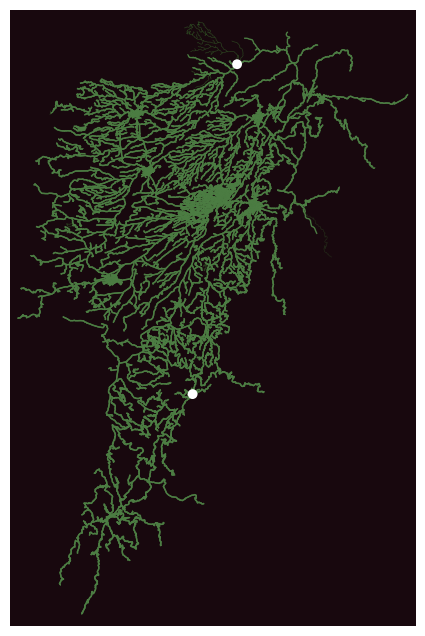

In [78]:
plot_graph()

Distance: 60.511989000000014
Avg. speed: 39.40119760479042
Total time: 92.14743613677814


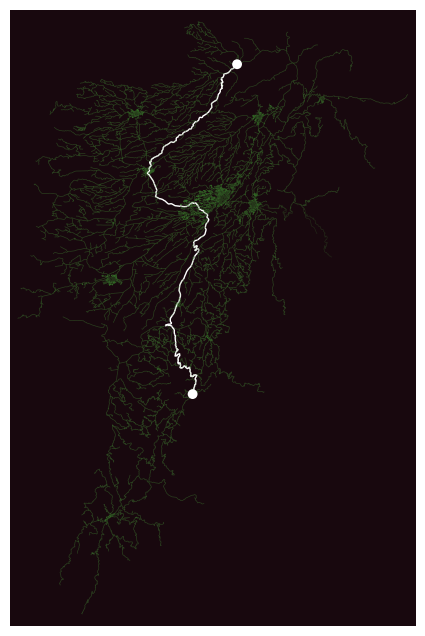

In [79]:
reconstruct_path(start_node, end_node, plot=True)

## 2.B Buenavista - Quimbaya
### Se usan las plazas principales de cada municipio como nodos de inicio y fin

In [80]:
start = (4.359529752012948, -75.73834799134275)
start_node = ox.distance.nearest_nodes(G, X=start[1], Y=start[0])
end = (4.622474183670408, -75.76308615678728)
end_node = ox.distance.nearest_nodes(G, X=end[1], Y=end[0])

In [81]:
dijkstra(start_node, end_node)

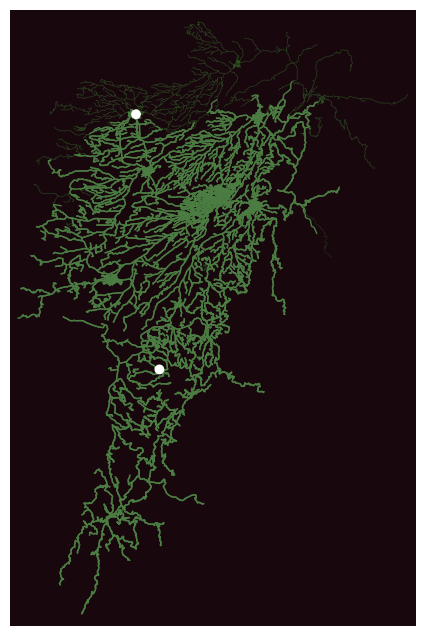

In [82]:
plot_graph()

Distance: 44.927775000000004
Avg. speed: 40.64935064935065
Total time: 66.31511837060702


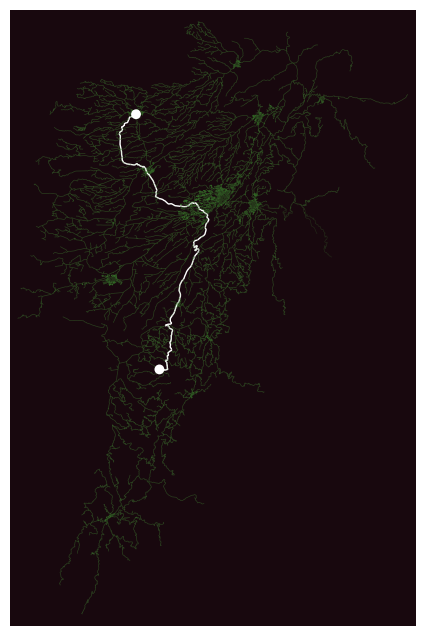

In [83]:
reconstruct_path(start_node, end_node, plot=True)